# Diabets

#### Import necessary libraries for data analysis, visualization, and machine learning

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, zscore ,anderson, kruskal, mannwhitneyu
import warnings
warnings.filterwarnings('ignore')

#### Load the diabetes dataset and display the first few rows to understand its structure

In [3]:
df = pd.read_csv("diabetes_dataset.csv")
df.head()

Age  Pregnancies    BMI  Glucose  BloodPressure  HbA1c    LDL   HDL  \
0   69            5  28.39    130.1           77.0    5.4  130.4  44.0   
1   32            1  26.49    116.5           72.0    4.5   87.4  54.2   
2   89           13  25.34    101.0           82.0    4.9  112.5  56.8   
3   78           13  29.91    146.0          104.0    5.7   50.7  39.1   
4   38            8  24.56    103.2           74.0    4.7  102.5  29.1   

   Triglycerides  WaistCircumference  HipCircumference   WHR  FamilyHistory  \
0           50.0                90.5             107.9  0.84              0   
1          129.9               113.3              81.4  1.39              0   
2          177.6                84.7             107.2  0.79              0   
3          117.0               108.9             110.0  0.99              0   
4          145.9                84.1              92.8  0.91              0   

   DietType  Hypertension  MedicationUse  Outcome  
0         0             0              1        0  
1         0             0              0        0  
2         0             0              1        0  
3         0             0              1        1  
4         1             0              0        0

#### Check the number of samples in the dataset

In [4]:
print(f"number of samples: {df.shape[0]}")

number of samples: 9538


#### Display dataset information (data types, non-null counts) to identify potential issues

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 9538 non-null   int64  
 1   Pregnancies         9538 non-null   int64  
 2   BMI                 9538 non-null   float64
 3   Glucose             9538 non-null   float64
 4   BloodPressure       9538 non-null   float64
 5   HbA1c               9538 non-null   float64
 6   LDL                 9538 non-null   float64
 7   HDL                 9538 non-null   float64
 8   Triglycerides       9538 non-null   float64
 9   WaistCircumference  9538 non-null   float64
 10  HipCircumference    9538 non-null   float64
 11  WHR                 9538 non-null   float64
 12  FamilyHistory       9538 non-null   int64  
 13  DietType            9538 non-null   int64  
 14  Hypertension        9538 non-null   int64  
 15  MedicationUse       9538 non-null   int64  
 16  Outcom

 - it seem like we don't have any missing value
 - it isn't any object type column

#### Check for duplicated rows and missing values in the dataset

In [6]:
print(f"Duplicated rows: {df.duplicated().sum()}")
print("-" * 80)
print("Missing values:")
df.isnull().sum()

Duplicated rows: 0
--------------------------------------------------------------------------------
Missing values:


Age                   0
Pregnancies           0
BMI                   0
Glucose               0
BloodPressure         0
HbA1c                 0
LDL                   0
HDL                   0
Triglycerides         0
WaistCircumference    0
HipCircumference      0
WHR                   0
FamilyHistory         0
DietType              0
Hypertension          0
MedicationUse         0
Outcome               0
dtype: int64

#### Generate summary statistics to understand data distribution

In [37]:
df.describe().T

count        mean        std    min      25%     50%  \
Age                 9072.0   53.353505  20.720559  18.00   35.000   53.00   
Pregnancies         9072.0    7.984237   4.937318   0.00    4.000    8.00   
BMI                 9072.0   26.926893   5.745200  15.00   22.870   26.98   
Glucose             9072.0  105.585516  21.322962  50.00   90.900  105.60   
BloodPressure       9072.0   84.186949  13.804056  60.00   74.000   84.00   
HbA1c               9072.0    4.639021   0.463843   4.00    4.300    4.60   
LDL                 9072.0  100.342824  29.104693  20.00   80.300  100.10   
HDL                 9072.0   50.011795  14.686449   9.10   39.900   50.20   
Triglycerides       9072.0  150.609799  48.374014  50.00  117.075  150.20   
WaistCircumference  9072.0   93.576334  14.988918  52.00   83.300   93.50   
HipCircumference    9072.0  103.100485  12.884779  67.00   94.300  103.20   
WHR                 9072.0    0.912568   0.132583   0.55    0.820    0.91   
FamilyHistory       9072.0    0.301367   0.458877   0.00    0.000    0.00   
MedicationUse       9072.0    0.399912   0.489907   0.00    0.000    0.00   
Outcome             9072.0    0.338183   0.473117   0.00    0.000    0.00   

                         75%     max  
Age                  71.0000   89.00  
Pregnancies          12.0000   16.00  
BMI                  30.9925   43.63  
Glucose             120.5000  165.10  
BloodPressure        94.0000  124.00  
HbA1c                 5.0000    6.00  
LDL                 120.2000  180.30  
HDL                  60.1000   90.90  
Triglycerides       184.8000  286.60  
WaistCircumference  104.0000  135.90  
HipCircumference    112.0000  138.80  
WHR                   1.0000    1.27  
FamilyHistory         1.0000    1.00  
MedicationUse         1.0000    1.00  
Outcome               1.0000    1.00

- nearly 33.8% of people in this dataset their test was positive so we have imbalance data
- Glucose levels show normal distribution (mean ≈ median)
- Significant cholesterol variation (LDL 20-180, HDL 9-90)
- FamilyHistory/MedicationUse show 30%/40% positive cases

#### Visualize the distribution of the target variable (Outcome) using a count plot

<Axes: xlabel='Outcome', ylabel='count'>

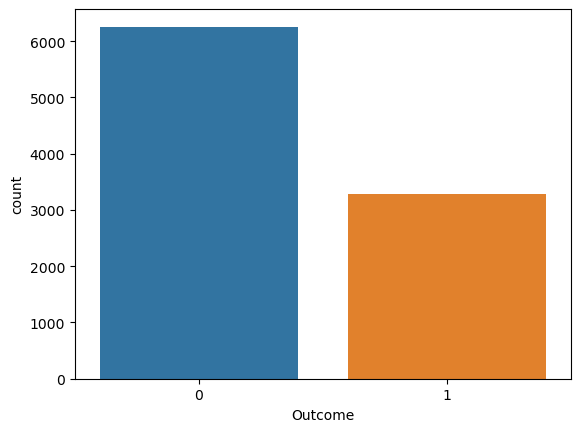

In [8]:
sns.countplot(x=df.Outcome)

#### Plot categorical features to analyze their distribution across the dataset

(4,)


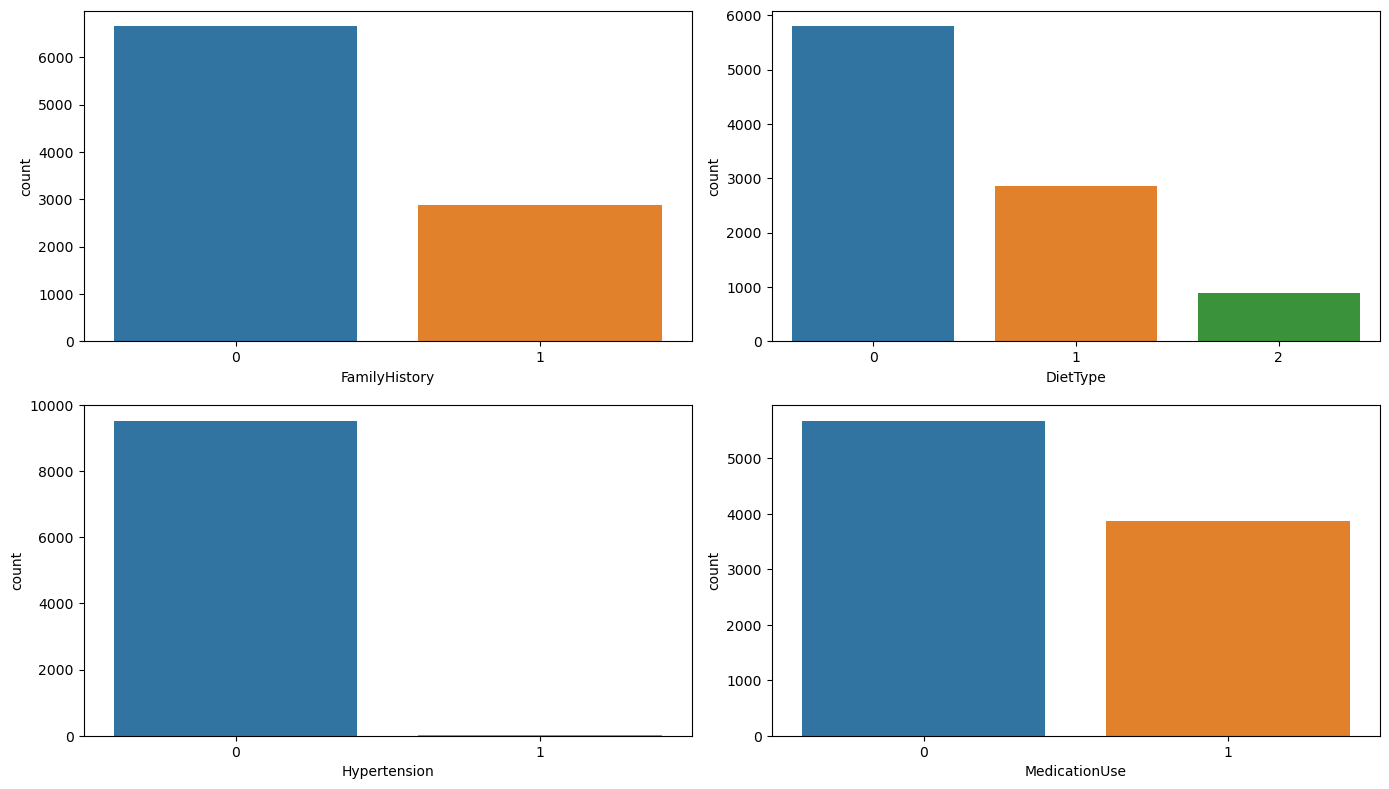

In [9]:
cat_columns = ['FamilyHistory', 'DietType', 'Hypertension', 'MedicationUse']

fig, ax = plt.subplots(2, 2, figsize=(14,8))
ax = ax.flatten()
print(ax.shape)
for i, col in enumerate(cat_columns):
    sns.countplot(x=df[col], ax=ax[i])
    ax[i].set_title(f"Count of {col}")
    ax[i].set_title("")

plt.tight_layout()
plt.show()

#### Check the proportion of Hypertension categories and drop the feature due to imbalance

In [10]:
df.Hypertension.value_counts(normalize=True)

Hypertension
0    0.998952
1    0.001048
Name: proportion, dtype: float64

In [11]:
df.drop('Hypertension', axis =1, inplace=True)
cat_columns.remove('Hypertension')

#### Assess normality of features using Anderson-Darling test and visualize distributions

In [12]:
def check_normality(col):
    result = anderson(col, dist='norm')
    index_5 = np.where(result.significance_level == 5)[0][0]

    if result.statistic < result.critical_values[index_5]:
        return True
    else:
        return False

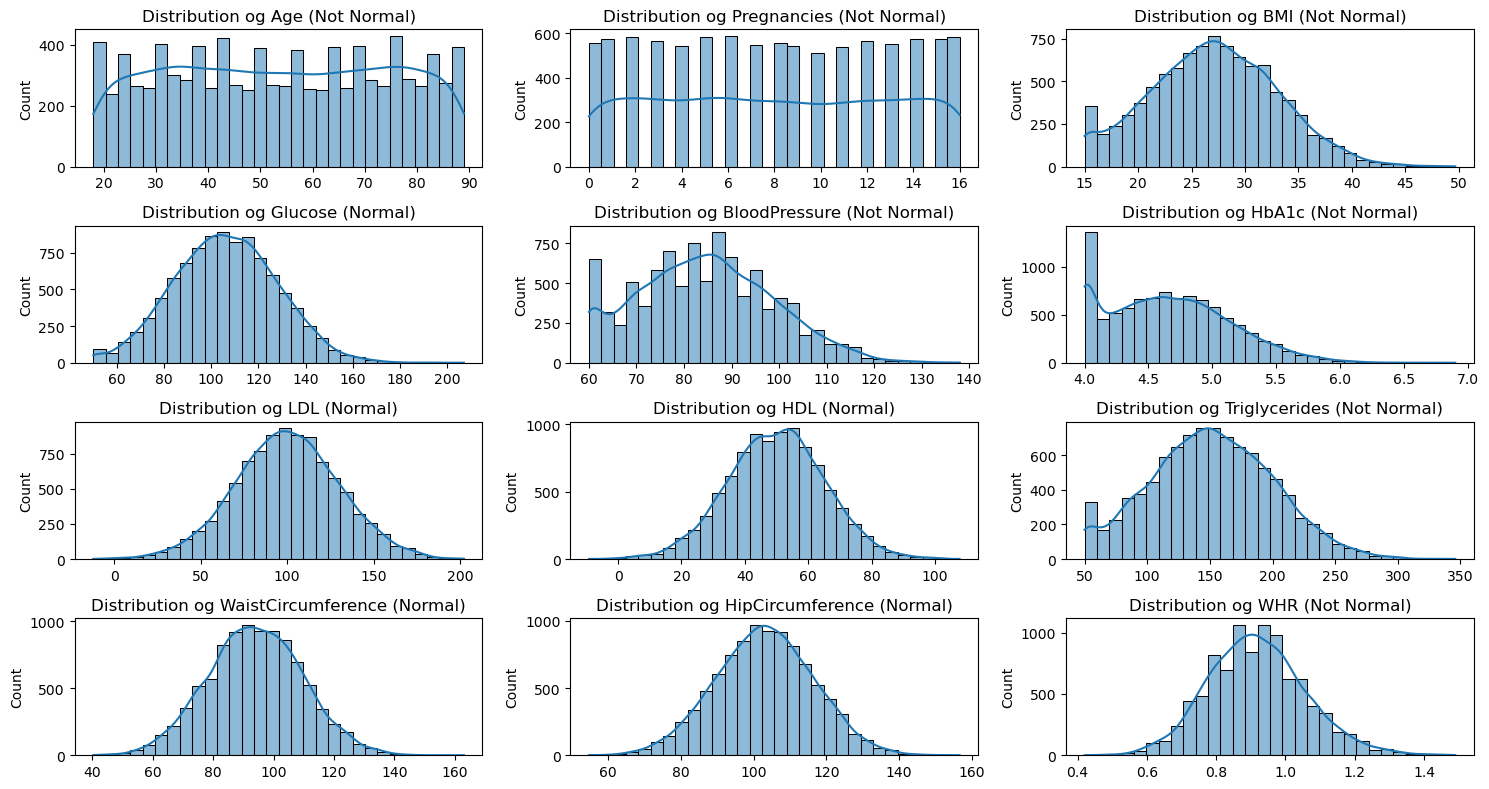

In [13]:
fig, ax = plt.subplots(4, 3, figsize=(15,8))
ax = ax.flatten()

num_columns = ['Age', 'Pregnancies']
num_columns.extend(df.select_dtypes(include='float').columns.to_list())

for i,col in enumerate(num_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=ax[i])
    ax[i].set_title(
        f"Distribution og {col} ({'Normal' if check_normality(df[col]) else 'Not Normal'})")
    ax[i].set_xlabel('')

plt.tight_layout()
plt.show()

In [14]:
normal_cols = ['Glucose', 'LDL', 'WaistCircumference', 'HDL', 'HipCircumference']
non_normal_cols = ['BloodPressure', 'BMI', 'HbA1c', 'Triglycerides', 'WHR']

#### Create boxplots to identify outliers in numerical features

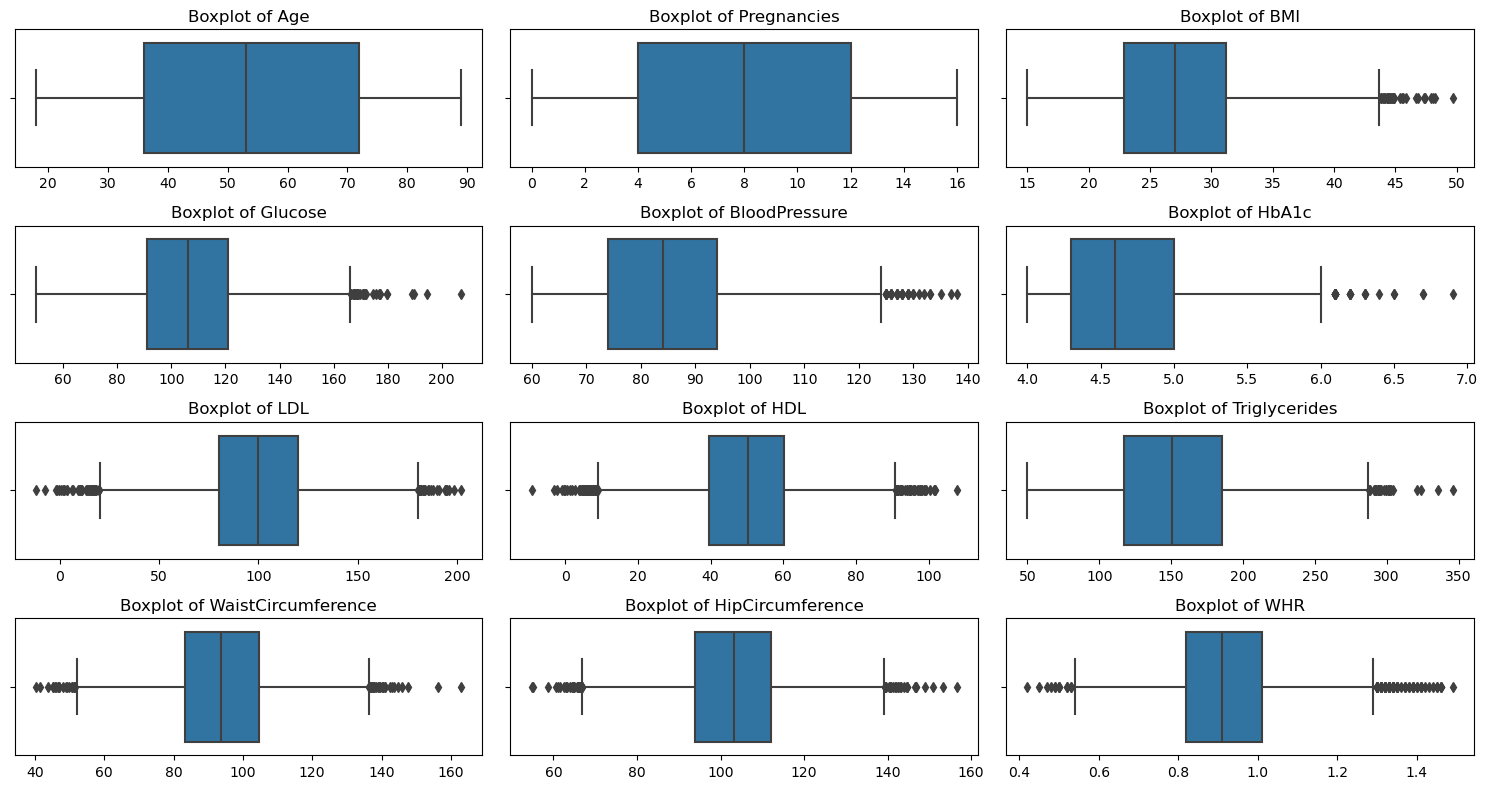

In [15]:
fig, ax = plt.subplots(4, 3, figsize=(15,8))
ax = ax.flatten()

for i, col in enumerate(num_columns):
    sns.boxplot(x=df[col], ax=ax[i])
    ax[i].set_title(f"Boxplot of {col}")
    ax[i].set_xlabel('')

plt.tight_layout()
plt.show()

#### Calculate and display outlier percentages for each numerical feature

In [16]:
def outlier_percentages(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    percentage = len(outliers) / len(df) * 100

    return round(percentage, 2)

In [17]:
for col in num_columns:
    outlier_percentage = outlier_percentages(df, col)
    print(f"Outlier Percentage in {col}: {outlier_percentage}%")

Outlier Percentage in Age: 0.0%
Outlier Percentage in Pregnancies: 0.0%
Outlier Percentage in BMI: 0.3%
Outlier Percentage in Glucose: 0.36%
Outlier Percentage in BloodPressure: 0.31%
Outlier Percentage in HbA1c: 0.33%
Outlier Percentage in LDL: 0.67%
Outlier Percentage in HDL: 0.92%
Outlier Percentage in Triglycerides: 0.3%
Outlier Percentage in WaistCircumference: 0.48%
Outlier Percentage in HipCircumference: 0.58%
Outlier Percentage in WHR: 0.91%


In [18]:
print(f"number of samples {df.shape[0]}")

number of samples 9538


- Since the outliers number are small in comparision with number of samples, we remove them from dataset

#### Remove outliers using the IQR method and display the cleaned dataset shape

In [19]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [20]:
for col in num_columns:
    df = remove_outliers(df, col)
print(f"number of samples: {df.shape[0]}")

number of samples: 9072


#### Recheck boxplots after outlier removal to confirm data cleaning

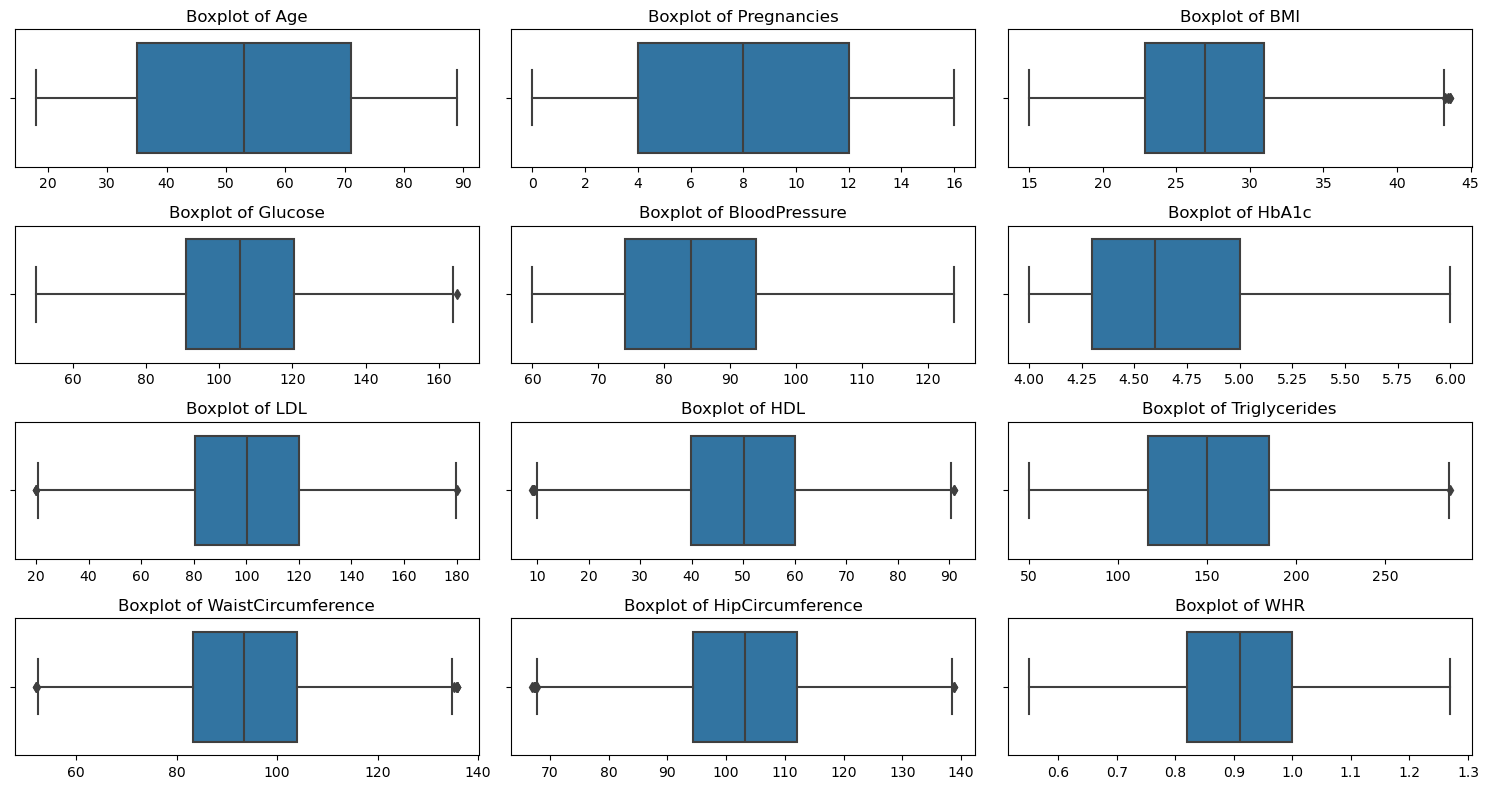

In [21]:
fig, ax = plt.subplots(4, 3, figsize=(15,8))
ax = ax.flatten()

for i, col in enumerate(num_columns):
    sns.boxplot(x=df[col], ax=ax[i])
    ax[i].set_title(f"Boxplot of {col}")
    ax[i].set_xlabel('')

plt.tight_layout()
plt.show()

#### Visualize correlation matrix to identify relationships between features

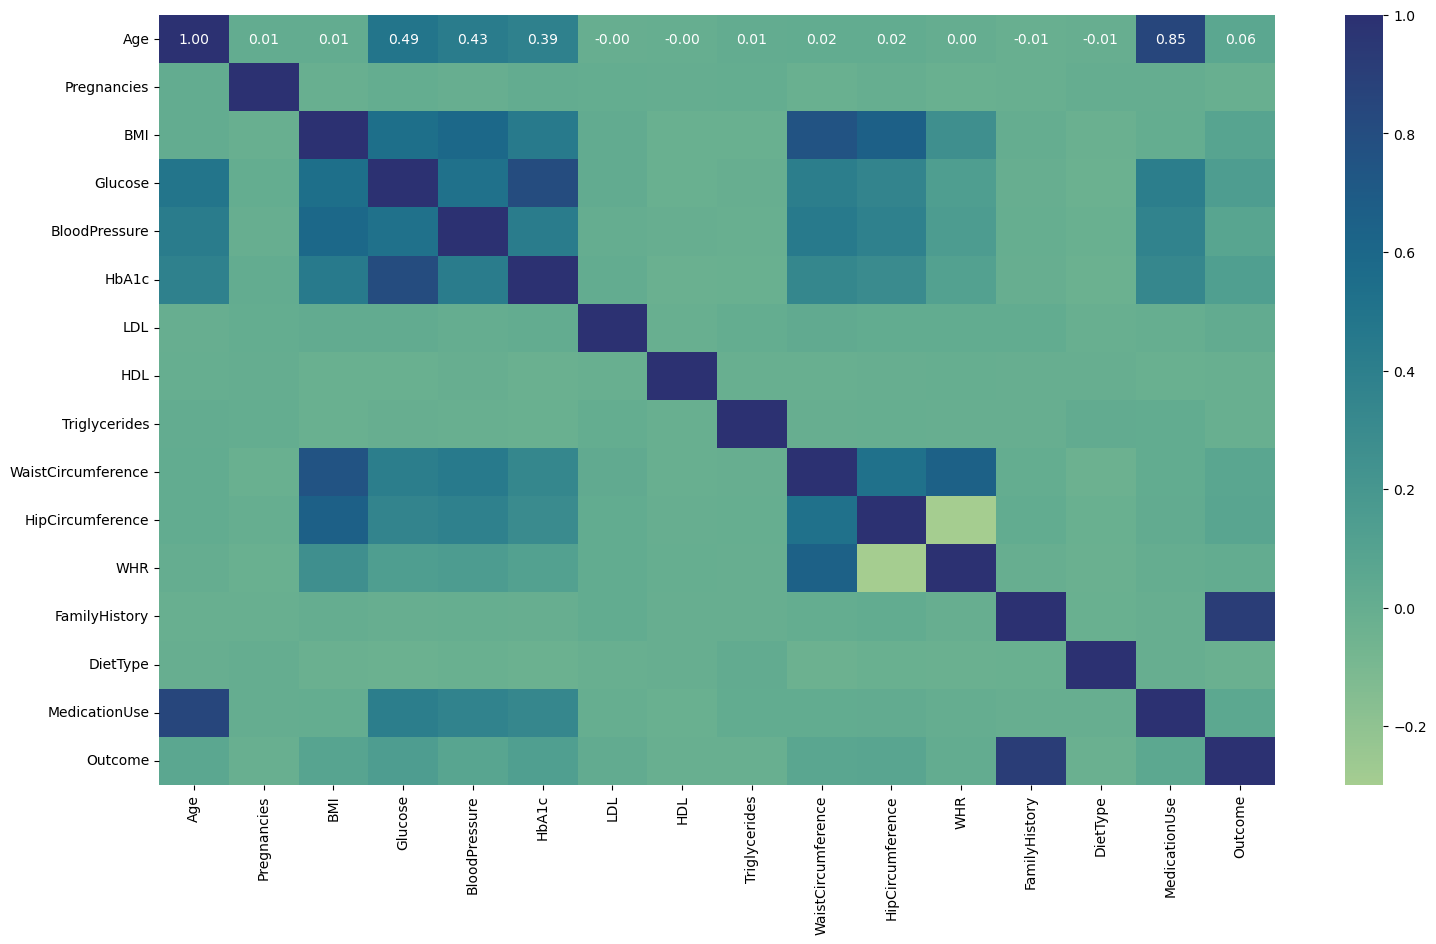

In [22]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='crest')
plt.show()

- Glucose and HbA1c columns shows linear relationship

#### Highlight features most correlated with the target variable (Outcome)

<Axes: >

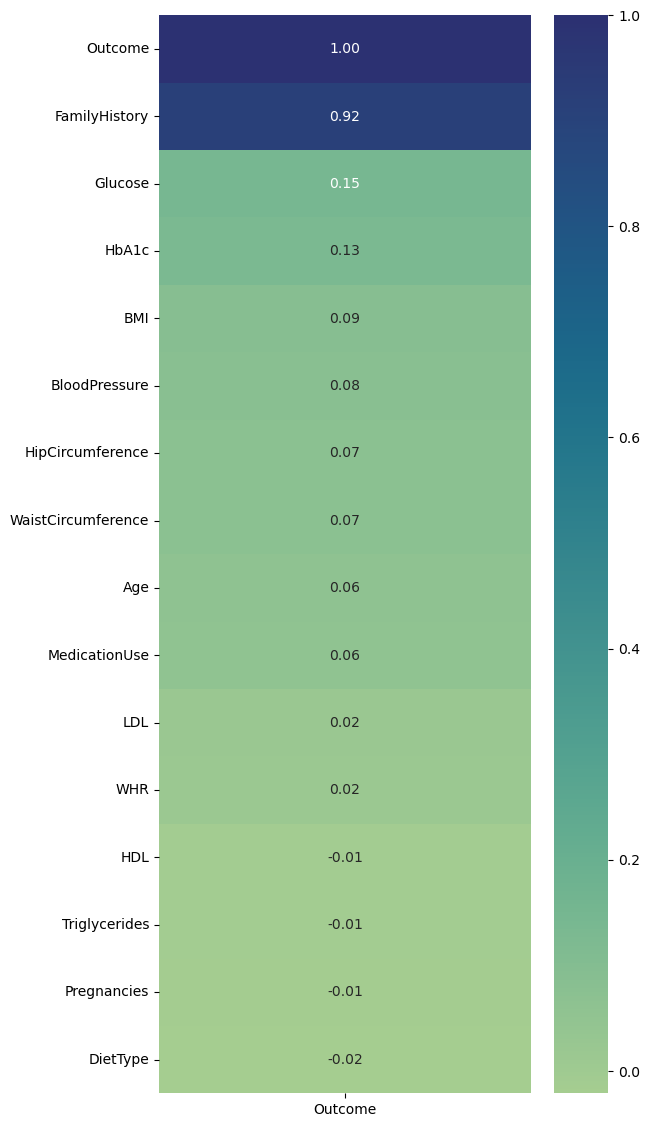

In [23]:
plt.figure(figsize=(6,14))
corr = df.corr()[['Outcome']].sort_values(by='Outcome', ascending=False)
sns.heatmap(corr,
           annot=True,
           fmt='.2f',
           cmap='crest')

- Family History feature shows strong relationship with the target column

#### Compare the probability of Outcome across categorical features using bar plots

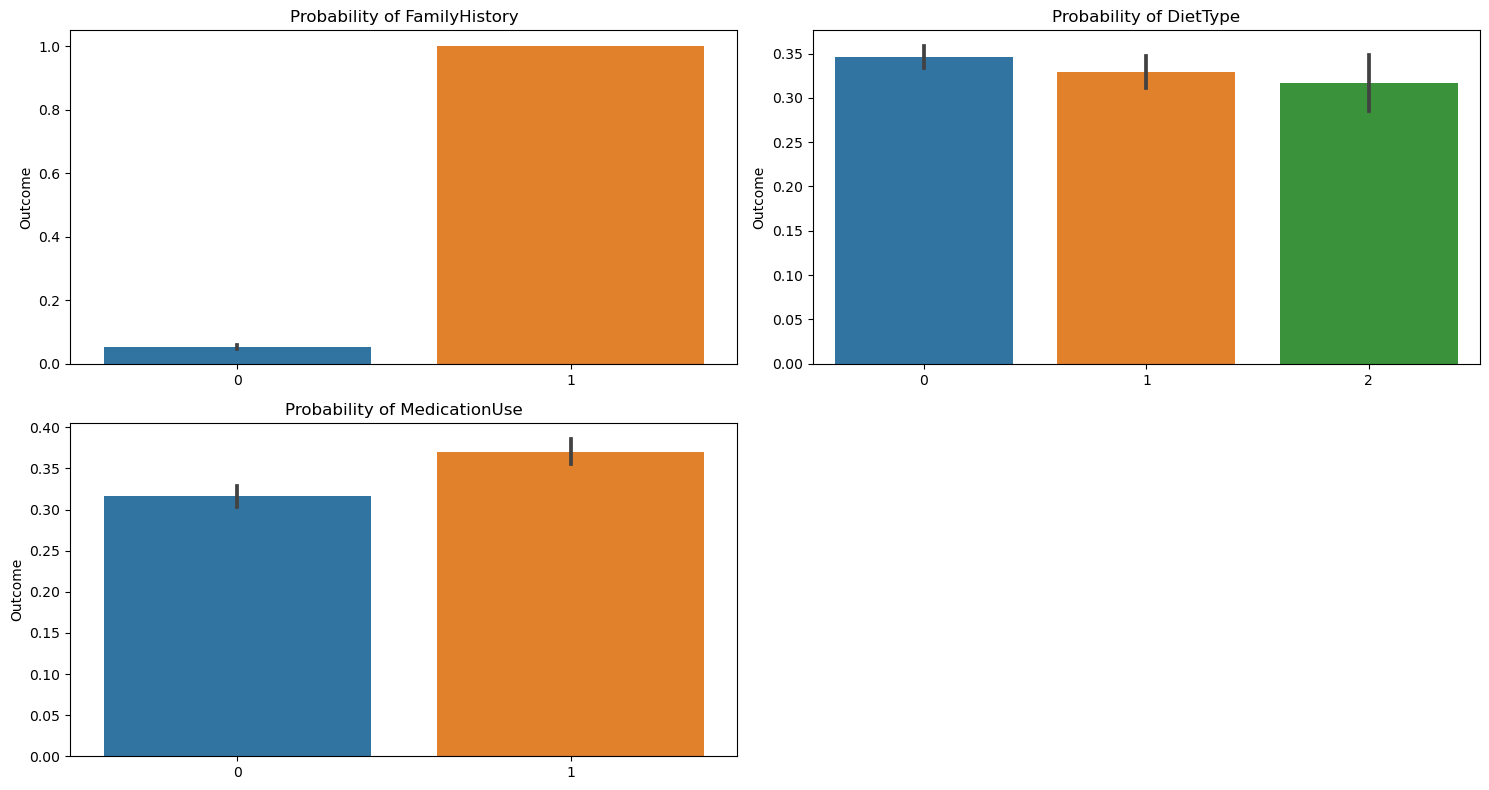

In [24]:
fig, ax = plt.subplots(2,2, figsize=(15,8))
ax = ax.flatten()

for i, col in enumerate(cat_columns):
    sns.barplot(data=df, x=col, y='Outcome', ax=ax[i])
    ax[i].set_title(f"Probability of {col}")
    ax[i].set_xlabel('')

fig.delaxes(ax[3])
plt.tight_layout()
plt.show()

- Diet Type column doesn't show any significant relation
- Medication Use shows a small relationship

#### Perform chi-square tests to assess associations between categorical features and Outcome

In [25]:
for col in cat_columns:
    contingency_table = pd.crosstab(df[col], df['Outcome'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Feature {col}")
    print(f"P-value: {p:.4f} which is {'less than' if p < 0.05 else 'greater than'} 0.05")
    print('-' * 75)

Feature FamilyHistory
P-value: 0.0000 which is less than 0.05
---------------------------------------------------------------------------
Feature DietType
P-value: 0.1259 which is greater than 0.05
---------------------------------------------------------------------------
Feature MedicationUse
P-value: 0.0000 which is less than 0.05
---------------------------------------------------------------------------


#### Drop 'DietType' due to insignificant p-value from chi-square test

In [26]:
df.drop('DietType', axis=1, inplace=True)
cat_columns.remove('DietType')

#### Visualize KDE plots for Age and Pregnancies by Outcome to identify distribution differences

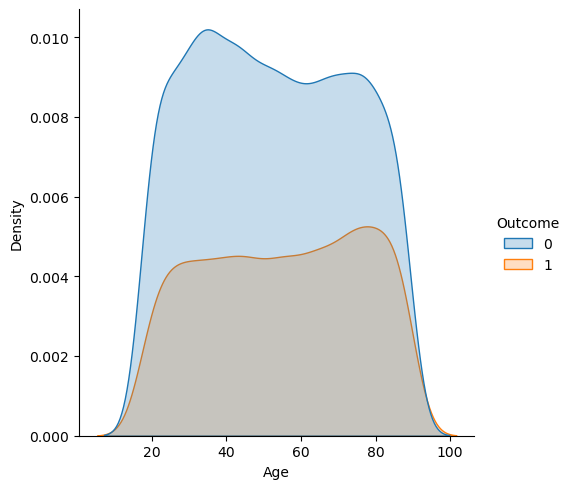

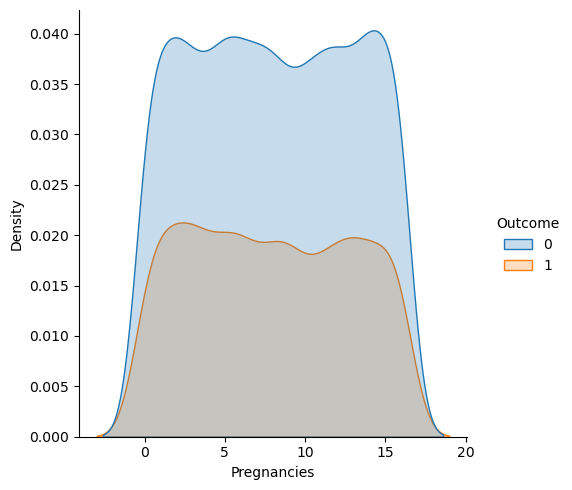

In [27]:
for i, col in enumerate(['Age', 'Pregnancies']):
    sns.displot(data=df, x=col, hue='Outcome', kind='kde', fill=True)
    plt.show()

- No visible relationship

#### Create pairplots to explore relationships between numerical features and Outcome

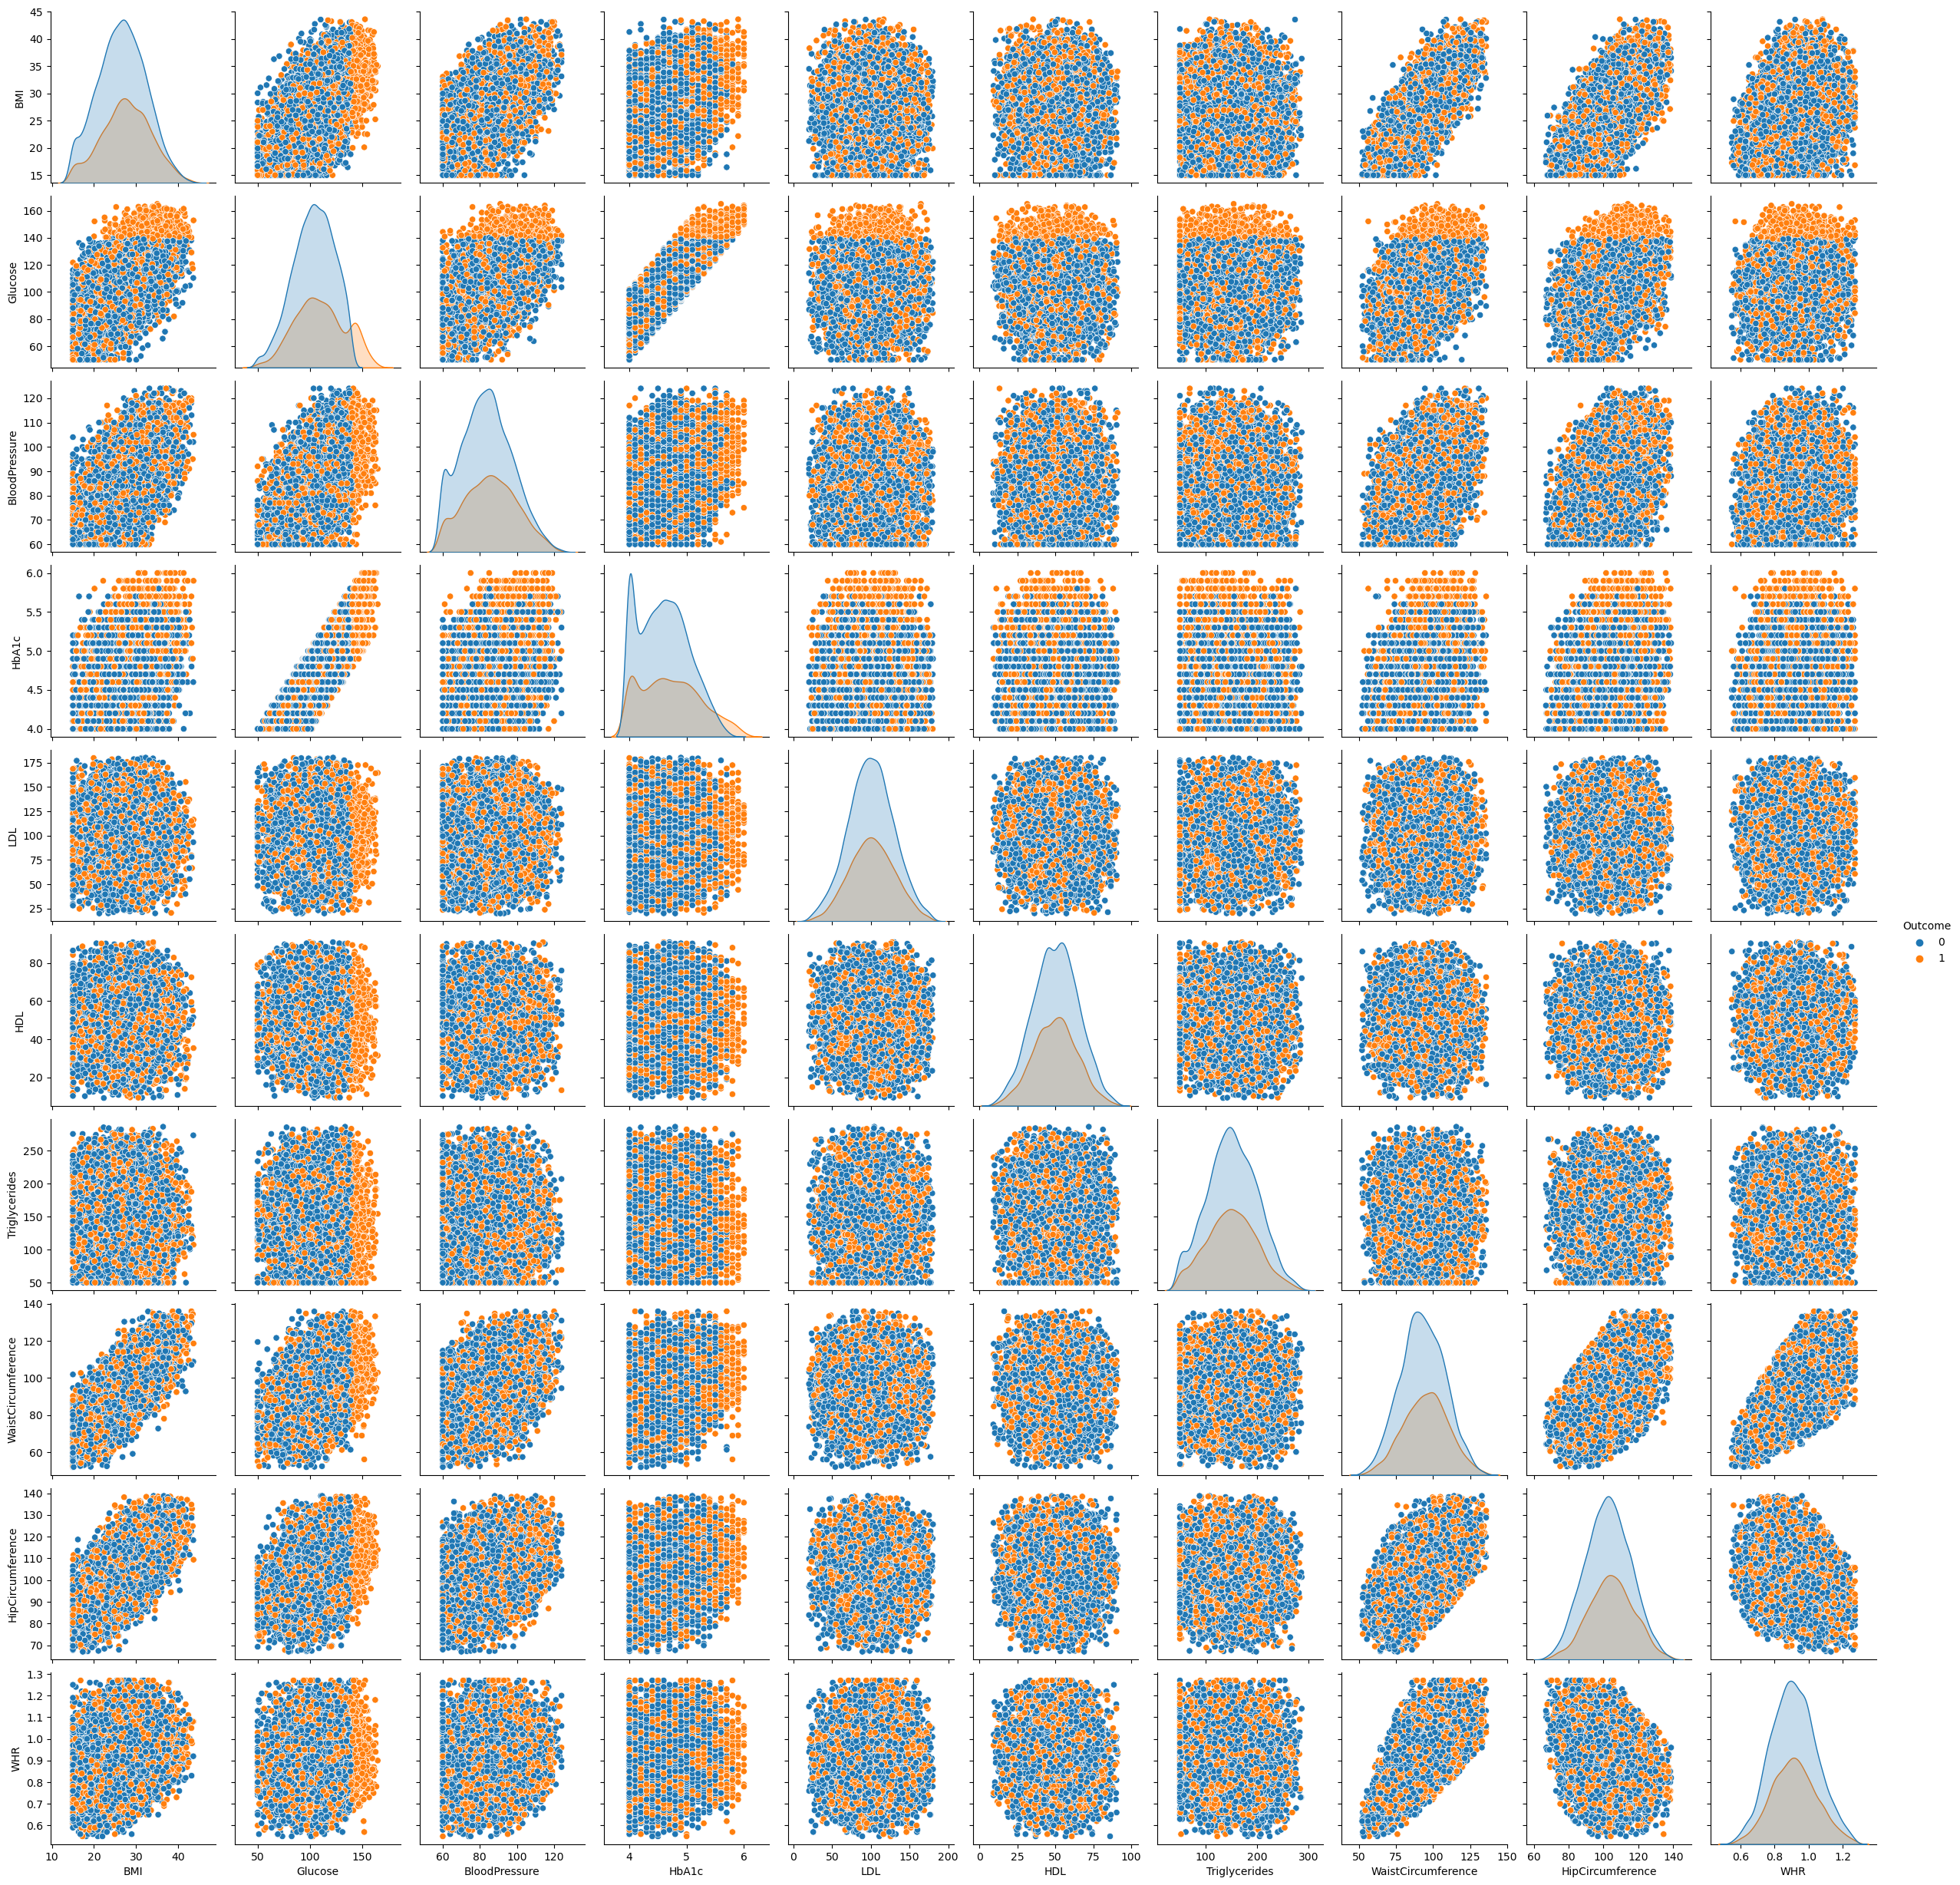

In [28]:
sns.pairplot(data=df, vars=df.select_dtypes(include='float'), hue='Outcome')
plt.show()

- As we saw in correlation of features heatmap we have linear relationship between Glucose and HbA1c features here the pair plot of features is showing us this relationship

#### Select final features for modeling based on EDA insights

In [29]:
X = df[['Glucose', 'FamilyHistory', 'MedicationUse']]
y = df[['Outcome']]

#### Split data into training and testing sets with stratification for balanced sampling

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (7257, 3)
X_test shape: (1815, 3)
y_train shape: (7257, 1)
y_test shape: (1815, 1)


#### Standardize numerical features to prepare for machine learning models

In [31]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### Train and evaluate multiple classification models using cross-validation

In [32]:
models = {
    'logistic Regression' : LogisticRegression(),
    'K-Nearest Nieghbors' : KNeighborsClassifier(n_neighbors=1),
    'Random Forest' : RandomForestClassifier(n_estimators=100)
}

In [33]:
for name, model in models.items():
    print('-' * 75)
    print(f"{name}:")

    kf = KFold(6, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kf)

    print(f"'Average cross validation score: {np.mean(scores)}")

---------------------------------------------------------------------------
logistic Regression:
'Average cross validation score: 0.9891975308641975
---------------------------------------------------------------------------
K-Nearest Nieghbors:
'Average cross validation score: 0.9997795414462081
---------------------------------------------------------------------------
Random Forest:
'Average cross validation score: 1.0


#### Determine optimal K value for K-Nearest Neighbors by analyzing error rates

In [34]:
error_rate = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_test = y_test.squeeze()
    error_rate.append(np.mean(y_pred != y_test))

Text(0, 0.5, 'Error Rate')

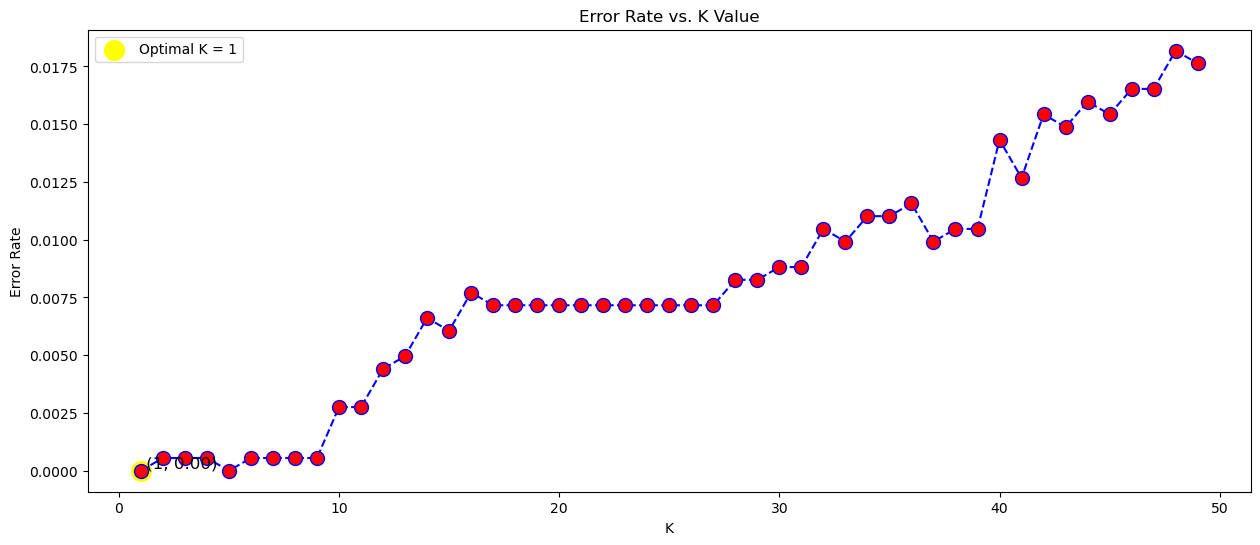

In [35]:
plt.figure(figsize=(15,6))
k_values = range(1,50)

plt.plot(k_values, error_rate, color='blue', linestyle='--', marker='o',
        markerfacecolor='red', markersize=10)
min_error_rate = min(error_rate)
optimal_k = k_values[error_rate.index(min_error_rate)]

plt.scatter(optimal_k, min_error_rate, color='yellow', s=200, label=f'Optimal K = {optimal_k}')  # Highlight the point
plt.text(optimal_k, min_error_rate, f' ({optimal_k}, {min_error_rate:.2f})', fontsize=12, ha='left', va='bottom')
plt.title('Error Rate vs. K Value')
plt.legend()
plt.xlabel('K')
plt.ylabel('Error Rate')